# <a id='toc1_'></a>[Проект: Анализ оттока клиентов банка](#toc0_)

## <a id='toc1_1_'></a>[Описание проекта:](#toc0_)
Банк предоставил данные о клиентах, включая их демографические характеристики, финансовые показатели, активность и использование банковских продуктов. Анализ этих данных позволил выявить ключевые факторы, влияющие на отток клиентов, и сформулировать рекомендации для снижения уровня ухода клиентов и повышения их лояльности.

## <a id='toc1_2_'></a>[Цель исследования:](#toc0_)
Определить основные причины оттока клиентов, выявить закономерности в поведении ушедших клиентов и разработать рекомендации для их удержания.

Источник данных: https://www.kaggle.com/datasets/gauravtopre/bank-customer-churn-dataset?resource=download

---

## <a id='toc1_3_'></a>[Вопросы:](#toc0_)
1. **Распределение клиентов:**
   - Как распределены клиенты по странам, полу и возрасту?
   - Сколько клиентов ушло и осталось?

2. **Финансовые показатели:**
   - Как баланс на счете связан с оттоком? Есть ли разница в балансах между ушедшими и оставшимися клиентами?
   - Влияет ли кредитный рейтинг на вероятность оттока?
   - Есть ли связь между зарплатой и оттоком?

3. **Продукты и активность:**
   - Как количество продуктов влияет на отток?
   - Чаще ли уходят клиенты без кредитной карты?
   - Как активность клиента связана с оттоком?

4. **Демография и поведение:**
   - Есть ли зависимость между возрастом и оттоком?
   - Как срок сотрудничества с банком влияет на вероятность ухода?

5. **Корреляции и взаимодействия:**
   - Есть ли связь между страной и оттоком?
   - Какие признаки наиболее сильно коррелируют с оттоком?

6. **Корреляция сложных признаков с оттоком клиентов:**
   - Подобрать сложные признаки (отношения признаков) и изучить их корреляцию с оттоком клиентов.

---
## <a id='toc1_4_'></a>[Поля данных:](#toc0_)

`customer_id` - уникальный идентификатор клиента в системе банка.

`credit_score` - кредитный рейтинг, отражающий кредитоспособность клиента.

`country` - страна проживания клиента.

`gender` - пол клиента.

`age` - возраст клиента.

`tenure` - количество лет, в течение которых клиент пользуется услугами банка.

`balance`  - сумма денег на счете клиента.

`products_number` - количество банковских продуктов, которыми пользуется клиент.

`credit_card` - Наличие кредитной карты. Бинарный признак: 1 — у клиента есть кредитная карта, 0 — нет.

`active_member` - активный клиент. Бинарный признак: 1 — клиент активно пользуется услугами банка, 0 — неактивен.

`estimated_salary` - оценка годового дохода клиента.

`churn` - Целевая переменная: 1 — клиент ушел из банка, 0 — клиент остался.

# Содержание:<a id='toc0_'></a>
- [Проект: Анализ оттока клиентов банка](#toc1_)    
  - [Описание проекта:](#toc1_1_)    
  - [Цель исследования:](#toc1_2_)    
  - [Вопросы](#toc1_3_)
  - [Поля данных](#toc1_4_)
- [Обзор таблиц](#toc2_)    
- [Предобработка данных](#toc3_)    
- [Исследование клиентов банка (EDA)](#toc4_)    
  - [Распределения клиентов](#toc4_1_)    
  - [Финансовые показатели](#toc4_2_)    
  - [Продукты и активность](#toc4_3_)    
  - [Демография и поведение](#toc4_4_)    
  - [Корреляции и взаимодействия](#toc4_5_)    
  - [Корреляция сложных признаков с оттоком клиентов](#toc4_6_)    
    - [Отношение возраста клиента к его балансу на счёте](#toc4_6_1_)
    - [Отношение возраста клиента к сроку сотрудничества с банком](#toc4_6_2_)
    - [Отношение баланса на счёте к предполагаемой зарплате](#toc4_6_3_)
    - [Отношение кредитного рейтинга к балансу на счете](#toc4_6_4_)
    - [Отношение предполагаемой зарплаты к возрасту клиента](#toc4_6_5_)
    - [Отношение кредитного рейтинга к предполагаемой зарплате](#toc4_6_6_)
- [Вывод](#toc5_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

Импортируем библиотеки:

In [687]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.offline as pyo
import plotly.io as pio

# Рендерер по умолчанию статический
pio.renderers.default = "png"

Чтение данных и определение функции для диагностики df:

In [688]:
# чтение
data = pd.read_csv('data\\bank_customer.csv', sep =',')

# определение функции
def df_diagnostics(df1):
    # основные характеристики столбцов
    diag = pd.DataFrame({
        'dtypes': df1.dtypes,
        'count': df1.count(),
        'unique': df1.nunique(),
        'nan_count': df1.isnull().sum(),
        'nan_%': df1.isnull().sum() / df1.shape[0] * 100})

    metrics = {
        'mean': lambda s: s.mean(),
        'median': lambda s: s.median(),
        'min': lambda s: s.min(),
        'max': lambda s: s.max()}

    # метрики только для числовых столбцов
    numeric_cols = df1.select_dtypes(include=[np.number]).columns
    for metric, func in metrics.items():
        diag[metric] = [func(df1[col]) if col in numeric_cols else np.nan
                        for col in df1.columns]

    # количество дублирующих строк в df
    duplicates_count = df1.duplicated().sum()
    print("Количество дублирующих строк:", duplicates_count)

    # df с градиентной подсветкой, форматированием и округлением чисел
    return (diag.style.background_gradient(cmap='Set3', low=0.1, high=0.01)
            .format("{:.2f}", subset=diag.select_dtypes(include=[np.number]).columns))

---
# <a id='toc2_'></a>[Обзор таблиц](#toc0_)


In [689]:
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Информация о таблице:

In [690]:
df_diagnostics(data)

Количество дублирующих строк: 0


,dtypes,count,unique,nan_count,nan_%,mean,median,min,max
customer_id,int64,10000.00,10000.00,0.00,0.00,15690940.57,15690738.00,15565701.00,15815690.00
credit_score,int64,10000.00,460.00,0.00,0.00,650.53,652.00,350.00,850.00
country,object,10000.00,3.00,0.00,0.00,nan,nan,nan,nan
gender,object,10000.00,2.00,0.00,0.00,nan,nan,nan,nan
age,int64,10000.00,70.00,0.00,0.00,38.92,37.00,18.00,92.00
tenure,int64,10000.00,11.00,0.00,0.00,5.01,5.00,0.00,10.00
balance,float64,10000.00,6382.00,0.00,0.00,76485.89,97198.54,0.00,250898.09
products_number,int64,10000.00,4.00,0.00,0.00,1.53,1.00,1.00,4.00
credit_card,int64,10000.00,2.00,0.00,0.00,0.71,1.00,0.00,1.00
active_member,int64,10000.00,2.00,0.00,0.00,0.52,1.00,0.00,1.00


Анализ информации о таблице показал, что:
- клиенты банка по полю `customer_id` все уникальные
- имена полей корректные
- типы данных в полях корректны
- в каждом поле по 10 000 значений, пропусков нет

Построим гистограммы распределений всех числовых полей:

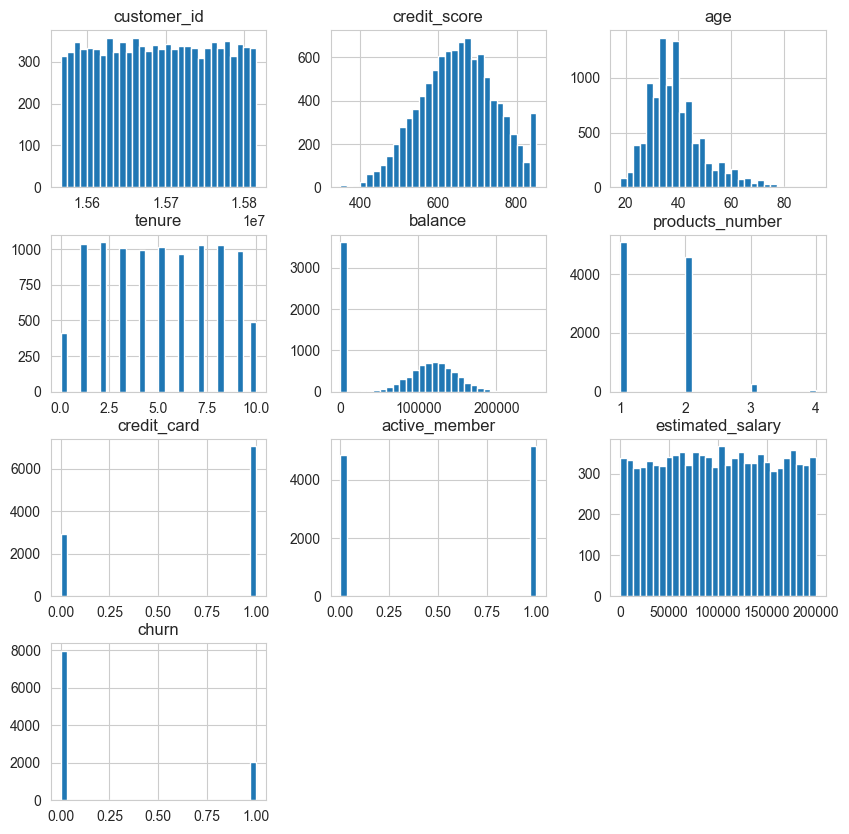

In [691]:
data.hist(bins=30, figsize=(10, 10))
plt.show()

---
# <a id='toc3_'></a>[Предобработка данных](#toc0_)

Для удобства дальнейшего анализа произведём следующие замены:
- для следующих полей с бинарным типом данных создадим доп поля с заменой значений 1 на "да" и 0 на "нет": credit_card, active_member, churn.
- в поле "gender" заменим "Male" на "Мужчины" и "Female" на "Женщины".
- переименуем названия стран.

In [692]:
# создаём одноимённое поле для поля credit_card
data['credit_card_str'] = data['credit_card'].replace({1: 'Да', 0: 'Нет'})

# создаём одноимённое поле для поля active_member
data['active_member_str'] = data['active_member'].replace({1: 'Да', 0: 'Нет'})

# создаём одноимённое поле для поля churn
data['churn_str'] = data['churn'].replace({1: 'Да', 0: 'Нет'})

# создаём одноимённое поле для поля gender
data['gender_str'] = data['gender'].replace({'Male': 'Мужчины', 'Female': 'Женщины'})

# создаём одноимённое поле для поля country
data['country_str'] = data['country'].replace({'France': 'Франция', 'Germany': 'Германия', 'Spain': 'Испания'})

`Вывод:` В процессе предобработки данных и для удобства дальнейшего анализа созданы одноимённые поля, в которых преобразованы значения:
- для полей credit_card, active_member, churn значения 1 заменены на "да" и значения 0 на "нет".
- для поля gender заменены значения: "Male" на "Мужчины" и "Female" на "Женщины".
- для поля country заменены значения: 'France': 'Франция', 'Germany': 'Германия', 'Spain': 'Испания'.

---
# <a id='toc4_'></a>[Исследование клиентов банка (EDA)](#toc0_)

Определим функцию для построения гистограммы:

In [693]:
def plots_histogram(df1, col_name, title, xaxis_title, yaxis_title, color=None, barmode='relative',
                    width=980, text_auto=False, marginal=None, labels=None, range_x=None, range_y=None,
                    show_percentages=False, show_quantiles=False):
    """Строит гистограмму с расширенными аналитическими возможностями
    :param df1: (df) Исходный DataFrame
    :param col_name: (str) Название столбца для анализа
    :param title: (str) Заголовок графика
    :param xaxis_title: (str) Название оси X
    :param yaxis_title: (str) Название оси Y
    :param color: (str) Столбец для группировки данных
    .Параметры настройки графиков
    :param show_percentages: (bool) Флаг вывода процентного распределения
    :param show_quantiles: (bool) Флаг вывода значений квартилей
    """

    # Валидация параметров аналитики
    if show_percentages and show_quantiles:
        raise ValueError("Нельзя одновременно использовать show_percentages и show_quantiles")

    # Вспомогательные функции
    def format_percent(value):
        return f"{value:.1f}".replace('.', ',')

    def print_quantiles(data, group_name=None):
        try:
            q = data.quantile([0.25, 0.5, 0.75]).round().astype(int)
            result = f"1-квартиль: {q[0.25]}, 2-квартиль: {q[0.5]}, 3-квартиль: {q[0.75]}"
            prefix = f"{group_name}: " if group_name else f"{xaxis_title}: "
            print(prefix + result)
        except Exception as e:
            print(f"Ошибка расчета квартилей: {str(e)}")

    # Логика для процентного распределения
    if show_percentages:
        df_filtered = df1.dropna(subset=[col_name])

        # Расчет распределения основной категории
        cat_dist = df_filtered[col_name].value_counts(normalize=True).mul(100)

        if color is None:
            for category, percent in cat_dist.items():
                print(f"{category} ({format_percent(percent)}%)")
        else:
            df_color_filtered = df_filtered.dropna(subset=[color])
            grouped = df_color_filtered.groupby([col_name, color]).size()

            for category in cat_dist.index:
                total_in_cat = grouped[category].sum()
                if total_in_cat == 0: continue

                parts = []
                for subcat, count in grouped[category].items():
                    percent = (count / total_in_cat) * 100
                    parts.append(f"{subcat} {format_percent(percent)}%")

                print(f"{category} ({format_percent(cat_dist[category])}%): {', '.join(parts)}")

    # Логика для расчета квартилей
    elif show_quantiles:
        clean_df = df1.dropna(subset=[col_name])

        if color and (color in clean_df):
            for group_name, group_data in clean_df.groupby(color):
                print_quantiles(group_data[col_name], group_name)
        else:
            print_quantiles(clean_df[col_name])

    # Построение графика
    fig = px.histogram(df1, x=col_name, color=color, title=title, marginal=marginal,
                       barmode=barmode, text_auto=text_auto, labels=labels,
                       range_x=range_x, range_y=range_y)

    fig.update_layout(width=width, height=400, margin=dict(t=40, b=10, l=10, r=10),
                      xaxis_title=xaxis_title, yaxis_title=yaxis_title, bargap=0.1)

    pyo.iplot(fig)

Определим функцию для построения графика баров:

In [694]:
def plots_bar_pie(data, x_column_cat, xaxis_title, yaxis_title, title, single=False,
                  aggregation='count', y_column=None, y_range=False, round_labels=0,
                  size_plot=False):
    """Строит столбчатую и круговую диаграммы для категоризованных данных.
    :param data: DataFrame с данными.
    :param x_column_cat: Название столбца для категоризации.
    :param xaxis_title: Заголовок оси X.
    :param yaxis_title: Заголовок оси Y.
    :param title: Заголовок графика.
    :param single: Если True, строит только столбчатую диаграмму. По умолчанию False.
    :param aggregation: Функция агрегации ('count', 'sum', 'mean', 'median' и т.д.). По умолчанию 'count'.
    :param y_column: Название столбца для оси Y. Если не указан, используется количество значений.
    :param y_range: Диапазон значений для оси Y в виде списка [min, max]. По умолчанию False (автоматический диапазон).
    :param round_labels: Степень округления значений в подписях меток. По умолчанию 1.
    :param size_plot: Размер графика в виде списка [width, height]. По умолчанию False (используются стандартные размеры).
    """

    # Применение функции агрегации
    if y_column is None:
        # Если y_column не указан, используем количество значений
        category_counts = data[x_column_cat].value_counts().sort_index()
    else:
        # Если y_column указан, применяем агрегацию к указанному столбцу
        category_counts = data.groupby(x_column_cat, observed=False)[y_column].agg(aggregation)

    # Округление значений для подписей меток
    category_counts_rounded = category_counts.round(round_labels)

    # Создание subplot
    if single:
        fig = make_subplots(rows=1, cols=1, column_titles=[title,])
    else:
        fig = make_subplots(rows=1, cols=2, specs=[[{"type": "bar"}, {"type": "pie"}]],
                           horizontal_spacing=0, column_titles=[title, 'Круговая диаграмма'])

    # Добавление столбчатой диаграммы
    fig.add_trace(go.Bar(x=category_counts.index, y=category_counts.values,
                        text=category_counts_rounded.values, textposition='auto',
                        name='Удельный вес:'), row=1, col=1)

    # Добавление круговой диаграммы (если single=False)
    if not single:
        fig.add_trace(go.Pie(labels=category_counts.index, values=category_counts.values), row=1, col=2)

    # Настройка макета
    layout_kwargs = {
        'margin': dict(t=40, b=10, l=10, r=10),
        'xaxis_title': xaxis_title,
        'yaxis_title': yaxis_title}

    # Если передан size_plot, используем его для width и height
    if size_plot:
        layout_kwargs['width'] = size_plot[0]
        layout_kwargs['height'] = size_plot[1]
    else:
        # Иначе используем стандартные размеры
        layout_kwargs['width'] = 980 if not single else 600
        layout_kwargs['height'] = 400

    # Если передан y_range, добавляем его в настройки макета
    if y_range:
        layout_kwargs['yaxis'] = {'range': y_range}

    fig.update_layout(**layout_kwargs)
    pyo.iplot(fig)
    return None

Определим функцию для построения графика распределения scatter:

In [695]:
def plot_scatter(data, x_column, x_label, y_column, y_label, title, x_range=None, y_range=None,
                 color=None, marginal_x=None, marginal_y=None, color_palette='Turbo'):

    # Расчёт корреляции между x_column и y_column
    correlation = data[[x_column, y_column]].corr().iloc[0, 1]
    print(f"Коэффициент корреляции между '{x_label}' и '{y_label}' равен: {correlation:.2f}")

    fig = px.scatter(data, x=x_column, y=y_column, trendline="ols", opacity=0.2,
                     trendline_color_override='red', range_x=x_range, range_y=y_range,
                     marginal_x=marginal_x, marginal_y=marginal_y, title=title, color=color,
                     color_continuous_scale=color_palette)

    # Настройка макета
    fig.update_layout(width=800, height=400, margin=dict(t=40, b=10, l=10, r=10),
                      xaxis_title=x_label, yaxis_title=y_label)
    pyo.iplot(fig)

Определим функцию для выделения данных в df:

In [696]:
def highlight_cells(data, col_select=None, highl_counts=(1, 1), col_heatmap=None, cmap='RdYlGn',
                    num_rows=10, decimal_places=0):
    """В заданных полях в df подсвечиваем макс и мин значения и/или красим столбец в тепловую карту.
    :param data: DataFrame, в котором нужно выделить ячейки.
    :param col_select: Список столбцов, в которых необходимо выделить ячейки.
    :param highl_counts: Список из двух чисел, кол-во макс и мин ячеек для подсветки.
    :param col_heatmap: Список столбцов, для которых нужно применить тепловую карту (по умолчанию None).
    :param cmap: Цветовая палитра для тепловой карты (по умолчанию 'RdYlGn').
    :param num_rows: Количество первых строк для отображения (например 10).
    :param decimal_places: Количество знаков после запятой для числовых столбцов (по умолчанию 1).
    :return: DataFrame с примененными стилями."""

    # Если входной объект - Series, преобразуем его в DataFrame
    if isinstance(data, pd.Series):
        data = data.to_frame()

    # Ограничиваем DataFrame до num_rows строк
    df_subset = data.head(num_rows)

    # Функция для подсветки ячеек
    def apply_highlight(x):
        # Создаем DataFrame с пустыми строками
        result = pd.DataFrame('', index=x.index, columns=x.columns)

        # Проходим по каждому столбцу из списка col_select
        for col in col_select:
            # Подсветка максимальных значений
            max_indices = x[col].nlargest(highl_counts[0]).index
            result.loc[max_indices, col] = 'background-color: green'

            # Подсветка минимальных значений
            min_indices = x[col].nsmallest(highl_counts[1]).index
            result.loc[min_indices, col] = 'background-color: red'

        return result

    # Применение стилей к DataFrame
    styled_df = df_subset.style

    # Если указаны столбцы для выделения ячеек
    if col_select:
        styled_df = styled_df.apply(apply_highlight, axis=None)

    # Если указаны столбцы для тепловой карты, то карту применяем к каждому
    if col_heatmap:
        for col in col_heatmap:
            styled_df = styled_df.background_gradient(subset=[col], cmap=cmap,
                            vmin=df_subset[col].min(), vmax=df_subset[col].max())

    # Форматирование числовых столбцов
    format_str = f"{{:.{decimal_places}f}}"  # Формат для чисел
    styled_df = styled_df.format(format_str, subset=col_select if col_select else col_heatmap)  # Применяем формат к указанным столбцам

    return styled_df

## <a id='toc4_1_'></a>[Распределения клиентов](#toc0_)

Изучим как клиенты распределены по странам:

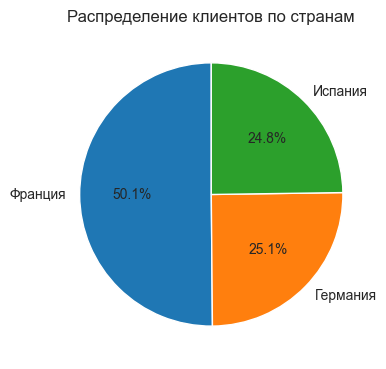

In [697]:
# Подсчитываем количество наблюдений по странам
counts = data['country_str'].value_counts()

# Строим круговую диаграмму
plt.figure(figsize=(4, 4))
plt.pie(counts,labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Распределение клиентов по странам')
plt.tight_layout()

`Вывод:` 50.1% клиентов банка из Франции, 25.1% из Германии и 24.8% из Испании.

Изучим как клиенты распределены по полу:

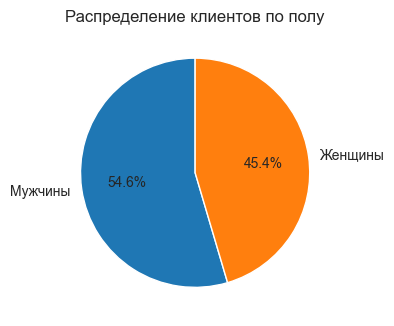

In [698]:
# Подсчитываем количество наблюдений по полу
counts = data['gender_str'].value_counts()

# Строим круговую диаграмму
plt.figure(figsize=(4, 4))
plt.pie(counts,labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Распределение клиентов по полу')
plt.tight_layout()

`Вывод:` 54.6% клиентов это мужчины и 45.4% это женщины.

Изучим как клиенты распределены по возрасту:

1-квартиль: 32, 2-квартиль: 37, 3-квартиль: 44


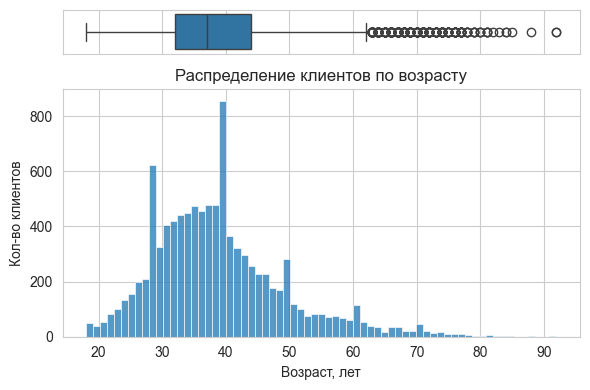

In [699]:
# рассчитываем квартили
q = (data["age"].quantile([0.25, 0.5, 0.75]).round().astype(int))
print(f"1-квартиль: {q[0.25]}, 2-квартиль: {q[0.5]}, 3-квартиль: {q[0.75]}")

# создаём композитный объект графика (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(6, 4),
                       gridspec_kw={"height_ratios": (.15, .85)})

# назначение графиков
sns.boxplot(data["age"], orient="h", ax=ax_box)
sns.histplot(data=data["age"], ax=ax_hist)

# удаляем имя оси x для boxplot
ax_box.set(xlabel='')
plt.title('Распределение клиентов по возрасту')
ax_hist.set_xlabel('Возраст, лет')
ax_hist.set_ylabel('Кол-во клиентов')
plt.tight_layout()

`Вывод:` Медианный возраст клиентов 37 лет и 50% клиентов распределено в возрасте от 32 до 44 лет. Стоит сегментировать клиентов по возрасту и разработать под каждый сегмент своё предложение.

Изучим сколько клиентов банка ушло и сколько ещё пользуется услугами банка:

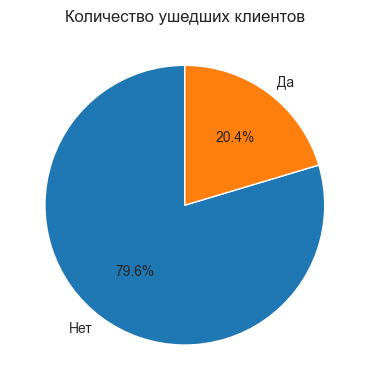

In [700]:
# Подсчитываем количество ушедших и нет клиентов
counts = data['churn_str'].value_counts()

# Строим круговую диаграмму
plt.figure(figsize=(4, 4))
plt.pie(counts,labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Количество ушедших клиентов')
plt.tight_layout()

`Вывод:` Из 100% клиентов, которые были когда-либо с банком 20.4% перестали пользоваться услугами банка. Значимый процент клиентов перестали пользоваться услугами банков. Необходимо разрабатывать меры по удержанию клиентов.

---
## <a id='toc4_2_'></a>[Финансовые показатели](#toc0_)

Изучим как баланс на счёте связан с оттоком. Есть ли разница в балансах между ушедшими и оставшимися клиентами?

Квартили 'баланс на счёте' по оттоку клиентов:
            0.25    0.50    0.75
churn_str                       
Да         38340  109349  131433
Нет            0   92073  126410


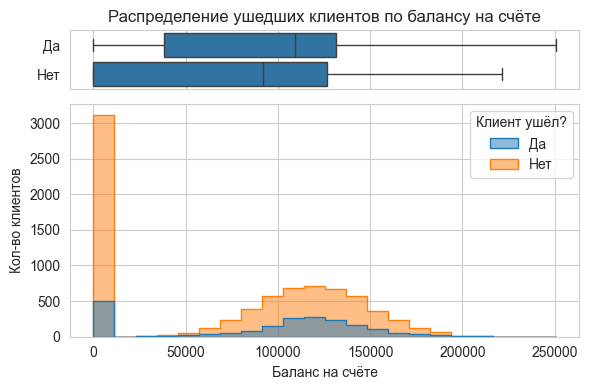

In [701]:
# Рассчитываем квартили для каждой категории
q_quant = (data.groupby('churn_str')['balance']
           .quantile([0.25, 0.5, 0.75])
           .round().astype(int))

print("Квартили 'баланс на счёте' по оттоку клиентов:")
print(q_quant.unstack())

# Создаём композитный график
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(6, 4),
                       gridspec_kw={"height_ratios": (.2, .8)})

# Boxplot для двух категорий
sns.boxplot(data=data, x='balance', y='churn_str', orient='h', ax=ax_box)
ax_box.set(xlabel='', ylabel='')  # Убираем подписи осей для boxplot

# Наложенные гистограммы
hist = sns.histplot(data=data, x='balance', hue='churn_str',  ax=ax_hist,
             element='step', stat='count', multiple='layer', alpha=0.5)

# Настройки оформления
ax_box.set_title('Распределение ушедших клиентов по балансу на счёте')
hist.legend_.set_title('Клиент ушёл?')
ax_hist.set_xlabel('Баланс на счёте')
ax_hist.set_ylabel('Кол-во клиентов')
plt.tight_layout()

`Вывод:` Баланс на счетах действующих и ушедших клиентов распределен примерно равномерно. Медианный баланс действующих клиентов 92073 и ушедших 109349. В среднем клиенты с большим балансом уходят чаще. Необходимо разработать комплекс мер для удержания более состоятельных клиентов.

Изучим как кредитный рейтинг связан с вероятностью оттока клиентов:

Квартили 'кредитный рейтинг' по оттоку клиентов:
           0.25  0.50  0.75
churn_str                  
Да          578   646   716
Нет         585   653   718


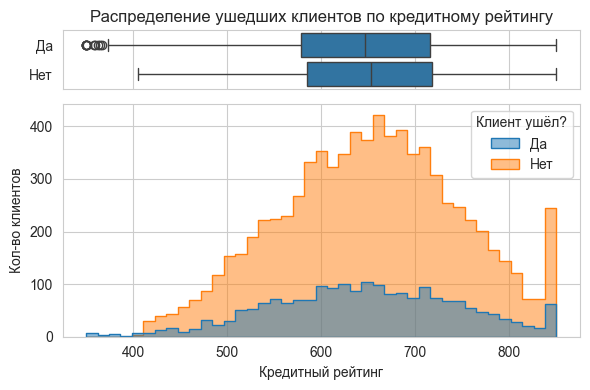

In [702]:
# Рассчитываем квартили для каждой категории
q_quant = (data.groupby('churn_str')['credit_score']
           .quantile([0.25, 0.5, 0.75])
           .round().astype(int))

print("Квартили 'кредитный рейтинг' по оттоку клиентов:")
print(q_quant.unstack())

# Создаём композитный график
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(6, 4),
                       gridspec_kw={"height_ratios": (.2, .8)})

# Boxplot для двух категорий
sns.boxplot(data=data, x='credit_score', y='churn_str', orient='h', ax=ax_box)
ax_box.set(xlabel='', ylabel='')  # Убираем подписи осей для boxplot

# Наложенные гистограммы
hist = sns.histplot(data=data, x='credit_score', hue='churn_str',  ax=ax_hist,
             element='step', stat='count', multiple='layer', alpha=0.5)

# Настройки оформления
ax_box.set_title('Распределение ушедших клиентов по кредитному рейтингу')
hist.legend_.set_title('Клиент ушёл?')
ax_hist.set_xlabel('Кредитный рейтинг')
ax_hist.set_ylabel('Кол-во клиентов')
plt.tight_layout()

`Вывод:` Ушедшие клиенты по кредитному рейтингу распределены примерно равномерно. Медианный кредитный рейтинг у действующих клиентов 6653 и у ушедших 646.

Изучим как предполагаемая зарплата связана с оттоком клиентов:

Квартили 'предполагаемая зарплата' по оттоку клиентов:
            0.25    0.50    0.75
churn_str                       
Да         51908  102461  152423
Нет        50783   99645  148610


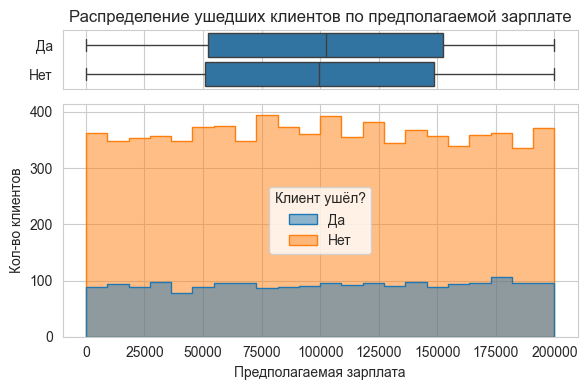

In [703]:
# Рассчитываем квартили для каждой категории
q_quant = (data.groupby('churn_str')['estimated_salary']
           .quantile([0.25, 0.5, 0.75])
           .round().astype(int))

print("Квартили 'предполагаемая зарплата' по оттоку клиентов:")
print(q_quant.unstack())

# Создаём композитный график
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(6, 4),
                       gridspec_kw={"height_ratios": (.2, .8)})

# Boxplot для двух категорий
sns.boxplot(data=data, x='estimated_salary', y='churn_str', orient='h', ax=ax_box)
ax_box.set(xlabel='', ylabel='')  # Убираем подписи осей для boxplot

# Наложенные гистограммы
hist = sns.histplot(data=data, x='estimated_salary', hue='churn_str',
        ax=ax_hist, element='step', stat='count', multiple='layer', alpha=0.5)

# Настройки оформления
ax_box.set_title('Распределение ушедших клиентов по предполагаемой зарплате')
hist.legend_.set_title('Клиент ушёл?')
ax_hist.set_xlabel('Предполагаемая зарплата')
ax_hist.set_ylabel('Кол-во клиентов')
plt.tight_layout()

`Вывод:` Ушедшие клиенты в зависимости от предполагаемой зарплаты распределены примерно равномерно.

---
## <a id='toc4_3_'></a>[Продукты и активность](#toc0_)

Изучим как количество используемых продуктов связано с оттоком клиентов:

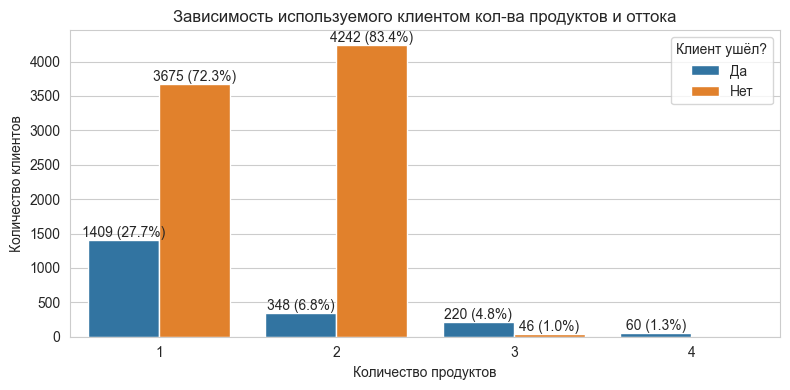

In [704]:
# Считаем данные и проценты
column = 'products_number'
count_data = (data
              .groupby([column, 'churn_str'])
              .size()
              .reset_index(name='count'))

total = (count_data
         .groupby(column)['count']
         .sum())

# Строим график
plt.figure(figsize=(8, 4))
ax = sns.barplot(x=column, y="count", hue="churn_str", data=count_data)

# Добавляем подписи с процентами
for container in ax.containers:
    ax.bar_label(container,
                labels=[f"{h:.0f} ({h/total[x]:.1%})"
                       for x, h in zip(count_data[column],
                                       container.datavalues)])

plt.title("Зависимость используемого клиентом кол-ва продуктов и оттока")
plt.legend(title="Клиент ушёл?")
plt.xlabel("Количество продуктов")
plt.ylabel("Количество клиентов")
plt.tight_layout()

`Вывод:` Процент ушедших клиентов среди пользующихся кол-вом услуг: 1 услуги - 27.7%, 2 услуги - 7.6%, 3 услуги - 82.7%, 4 услуги - 100% клиентов ушли. Необходимо срочно принять меры и разобраться почему клиенты с большим количеством используемых услуг уходят значительно чаще. Может совокупная стоимость владения 3-4 услугами высока относительно получаемой клиентом ценности?

Изучим как использование кредитной карты связано с оттоком клиентов:

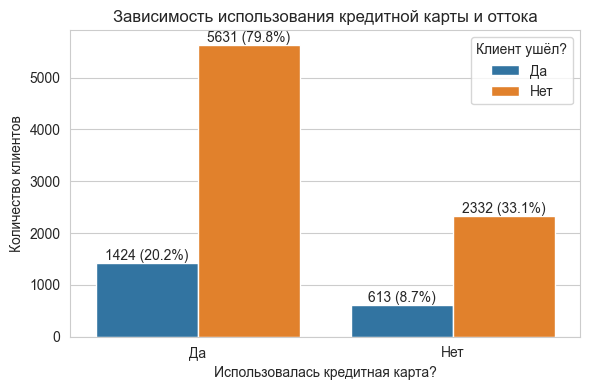

In [705]:
# Считаем данные и проценты
column = 'credit_card_str'
count_data = (data
              .groupby([column, 'churn_str'])
              .size()
              .reset_index(name='count'))

total = (count_data
         .groupby(column)['count']
         .sum())

# Строим график
plt.figure(figsize=(6, 4))
ax = sns.barplot(x=column, y="count", hue="churn_str", data=count_data)

# Добавляем подписи с процентами
for container in ax.containers:
    ax.bar_label(container,
                labels=[f"{h:.0f} ({h/total[x]:.1%})"
                       for x, h in zip(count_data[column],
                                       container.datavalues)])

plt.title("Зависимость использования кредитной карты и оттока")
plt.legend(title="Клиент ушёл?")
plt.xlabel("Использовалась кредитная карта?")
plt.ylabel("Количество клиентов")
plt.tight_layout()

`Вывод:` Процент ушедших клиентов среди пользующихся и не пользующихся кредитной картой примерно равен 20%.

Изучим как активность клиента связана с оттоком клиентов:

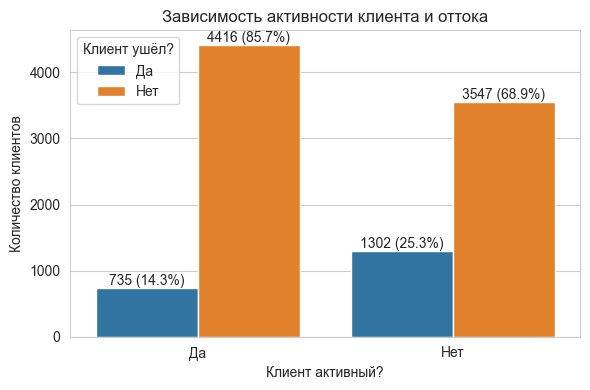

In [706]:
# Считаем данные и проценты
column = 'active_member_str'
count_data = (data
              .groupby([column, 'churn_str'])
              .size()
              .reset_index(name='count'))

total = (count_data
         .groupby(column)['count']
         .sum())

# Строим график
plt.figure(figsize=(6, 4))
ax = sns.barplot(x=column, y="count", hue="churn_str", data=count_data)

# Добавляем подписи с процентами
for container in ax.containers:
    ax.bar_label(container,
                labels=[f"{h:.0f} ({h/total[x]:.1%})"
                       for x, h in zip(count_data[column],
                                       container.datavalues)])

plt.title("Зависимость активности клиента и оттока")
plt.legend(title="Клиент ушёл?")
plt.xlabel("Клиент активный?")
plt.ylabel("Количество клиентов")
plt.tight_layout()

`Вывод:` Процент ушедших клиентов среди активных равен 14.3% и среди не активных 26.9%. Можно сделать вывод, что активность оказывает влияние и более активные клиенты уходят реже. Необходимо разработать ряд мер, направленных на увеличение активности клиентов.

---
## <a id='toc4_4_'></a>[Демография и поведение](#toc0_)

Изучим как возраст клиентов связан с их оттоком:

Да: 1-квартиль: 38, 2-квартиль: 45, 3-квартиль: 51
Нет: 1-квартиль: 31, 2-квартиль: 36, 3-квартиль: 41


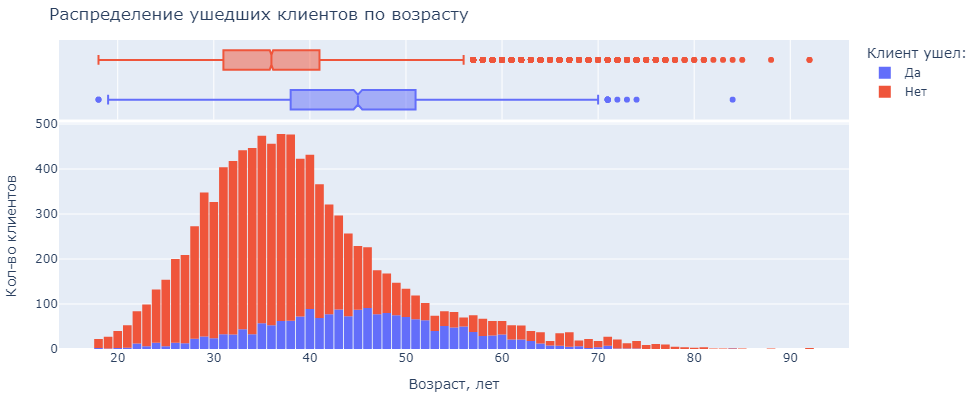

In [707]:
plots_histogram(data, "age", 'Распределение ушедших клиентов по возрасту', "Возраст, лет",
                "Кол-во клиентов", color="churn_str", marginal="box",
                labels={'churn_str': 'Клиент ушел:'}, show_quantiles=True)

`Вывод:` Медианный возраст действующих клиентов 36 и ушедших 45 лет. 50% клиентов по возрасту распределено среди действующих в диапазоне 31-41 год, и среди ушедших в диапазоне 38-51 год. В среднем клиенты более высокого возраста уходят от сотрудничества с банком. Возможно стоит разработать меры по привлечению и удержанию клиентов по старше.

Изучим как срок сотрудничества с банком связан с оттоком:

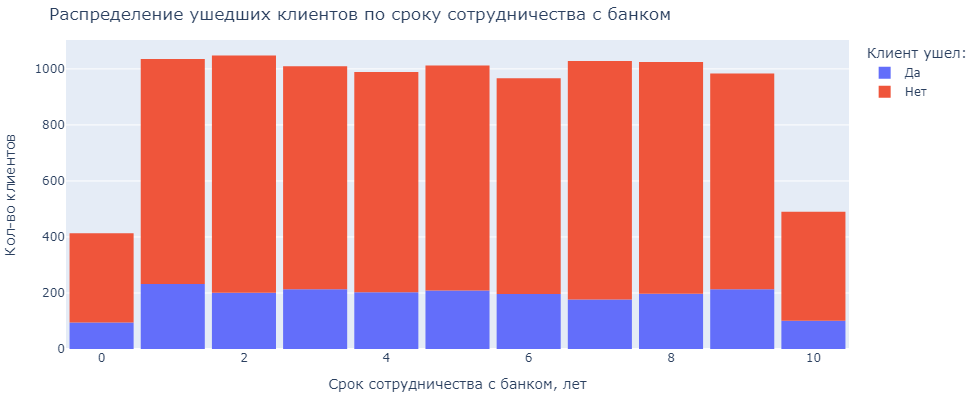

In [708]:
plots_histogram(data, "tenure", 'Распределение ушедших клиентов по сроку сотрудничества с банком',
                "Срок сотрудничества с банком, лет", "Кол-во клиентов",
                color="churn_str", labels={'churn_str': 'Клиент ушел:'})

`Вывод:` Клиенты уходят на разном сроке сотрудничества с банком примерно в одинаковом проценте случаев.

---
## <a id='toc4_5_'></a>[Корреляции и взаимодействия](#toc0_)

Изучим как страна клиента связана с оттоком клиентов:

Франция (50,1%): Да 16,2%, Нет 83,8%
Германия (25,1%): Да 32,4%, Нет 67,6%
Испания (24,8%): Да 16,7%, Нет 83,3%


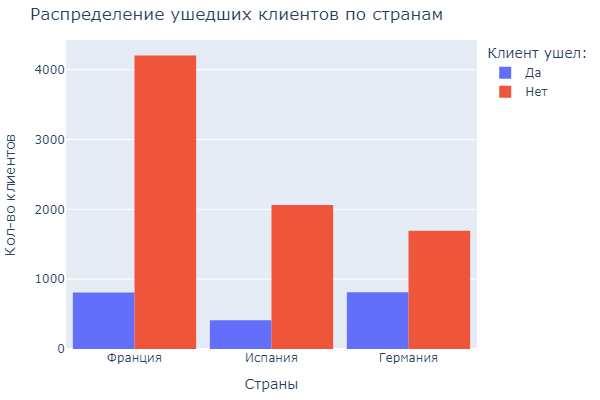

In [709]:
plots_histogram(data, "country_str", 'Распределение ушедших клиентов по странам', "Страны",
                "Кол-во клиентов", color="churn_str", barmode="group", width=600,
                labels={'churn_str': 'Клиент ушел:'}, show_percentages=True)

`Вывод:` Процент ушедших клиентов составил для Франции 16.2%, для Германии 32.4% и для Испании 16.7%. Необходимо выяснить почему процент ушедших клиентов в Германии значительно выше.

Построим матрицу корреляций признаков с полем оттока и на основе построим тепловую карту:

In [710]:
# Выбор только числовых столбцов
numeric_df = data.select_dtypes(include=['number'])

# Расчет корреляции
correlation = numeric_df.corr()

# Корреляция с целевой переменной 'churn'
churn_corr = correlation['churn'].sort_values(ascending=False)

# Накладываем на поле тепловую карту для наглядности
data_styled = highlight_cells(data=churn_corr, col_heatmap=['churn', ], decimal_places=3)

print("Корреляция числовых признаков с оттоком клиентов:")
data_styled

Корреляция числовых признаков с оттоком клиентов:


,churn
churn,1.000
age,0.285
balance,0.119
estimated_salary,0.012
customer_id,-0.006
credit_card,-0.007
tenure,-0.014
credit_score,-0.027
products_number,-0.048
active_member,-0.156


`Вывод:` анализ корреляции числовых признаков показал следующее: признак "возраст" имеет низкую корреляцию 0.285 и признак "баланс на счёте" ещё ниже 0.119. Остальные признаки имеют также не значительные корреляции и уходящие в отрицательные. Можно выделить значение с наибольшей отрицательной корреляцией поля "активность пользователя" равную -0.156.

В итоге можно сделать следующие выводы:
1. с увеличением возраста клиенты немного более склонны к оттоку.
2. более активные клиенты чаще остаются с банком, что предсказуемо.

---
## <a id='toc4_6_'></a>[Корреляция сложных признаков с оттоком клиентов](#toc0_)

### <a id='toc4_6_1_'></a>[Отношение возраста клиента к его балансу на счёте](#toc0_)

Изучим данную связь и для этого создадим поле "age_balance_ratio" с данным новым признаком. Возраст делим на баланс на счёте.

После этого построим график распределения, показывающий взаимосвязь. На оси x на графике слева расположены молодые клиенты и с большими суммами на счету, а справа клиенты в возрасте и с меньшими суммами на счету. Слева на право возраст увеличивается, а баланс на счёте уменьшается.

Коэффициент корреляции между 'Возраст / Баланс' и 'Отток клиентов' равен: -0.07


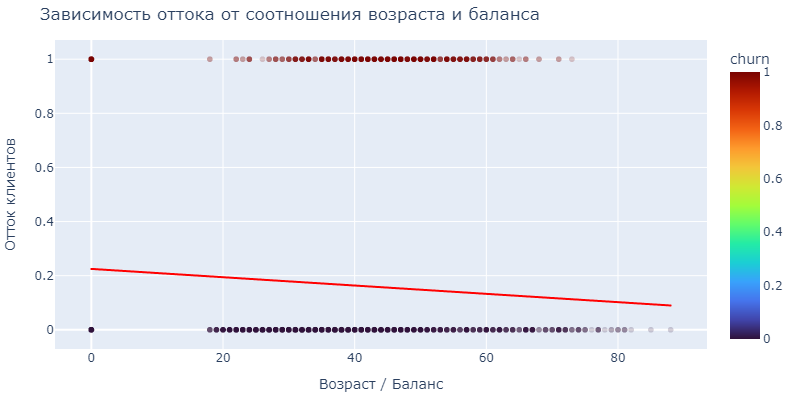

In [711]:
data['age_balance_ratio'] = data['age'] / (data['balance'] + 1)  # +1 для избежания деления на 0

plot_scatter(data, 'age_balance_ratio', 'Возраст / Баланс', 'churn', 'Отток клиентов',
             'Зависимость оттока от соотношения возраста и баланса', color='churn')

`Вывод:` С ростом отношения "Возраст / Баланс" отток клиентов снижается. Корреляция -0.07. Анализ говорит о том, что клиенты с большим возрастом и меньшим балансом реже уходят из банка и более лояльны.

Клиенты с маленьким балансом и/или старшие клиенты более лояльны. Они реже уходят из банка, возможно, потому что:
- У них меньше альтернатив для перехода в другие банки.
- Они менее склонны к риску и предпочитают оставаться в привычном банке.
- Их баланс настолько мал, что они не видят смысла менять банк.

Клиенты с большим балансом и/или молодые клиенты чаще уходят. Это может быть связано с тем, что:
- У них больше финансовых возможностей и они активнее ищут выгодные условия в других банках.
- Они более мобильны и открыты к изменениям.
- Их большой баланс делает их привлекательными для других банков, которые предлагают более выгодные условия.

### <a id='toc4_6_2_'></a>[Отношение возраста клиента к сроку сотрудничества с банком](#toc0_)

Изучим данную связь и для этого создадим поле "age_tenure_ratio" с данным новым признаком. Возраст делим на срок сотрудничества клиента с банком.

После этого построим график распределения, показывающий взаимосвязь. На оси x на графике слева расположены клиенты, которые начали сотрудничать с банком в молодом, а справа в более зрелом возрасте.

Коэффициент корреляции между 'Возраст / Срок сотрудничества' и 'Отток клиентов' равен: 0.11


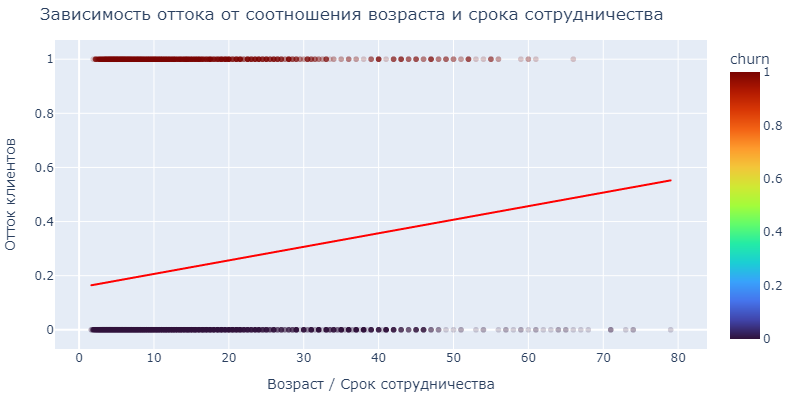

In [712]:
data['age_tenure_ratio'] = data['age'] / (data['tenure'] + 1)  # +1 для избежания деления на 0

plot_scatter(data, 'age_tenure_ratio', 'Возраст / Срок сотрудничества', 'churn', 'Отток клиентов',
             'Зависимость оттока от соотношения возраста и срока сотрудничества', color='churn')

`Вывод:` С ростом отношения "Возраст / Срок сотрудничества" отток клиентов повышается. Корреляция 0.11. Анализ говорит о том, что клиенты, которые начали сотрудничать с банком в более раннем возрасте меньше уходят от сотрудничества с банком, чем те, кто пришёл в банк в более зрелом возрасте.

### <a id='toc4_6_3_'></a>[Отношение баланса на счёте к предполагаемой зарплате](#toc0_)

Изучим данную связь и для этого создадим поле "balance_estimated_salary_ratio" с данным новым признаком. Баланс на счёте делим на предполагаемый размер зарплаты.

После этого построим график распределения, показывающий взаимосвязь. На оси x на графике слева расположены клиенты, которые тратят большую часть своих доходов и/или хранят деньги в других местах. Справа на оси расположены клиенты, которые хранят большую часть своих доходов на счёте.

Коэффициент корреляции между 'Баланс на счёте / Предполагаемая зарплата' и 'Отток клиентов' равен: 0.03


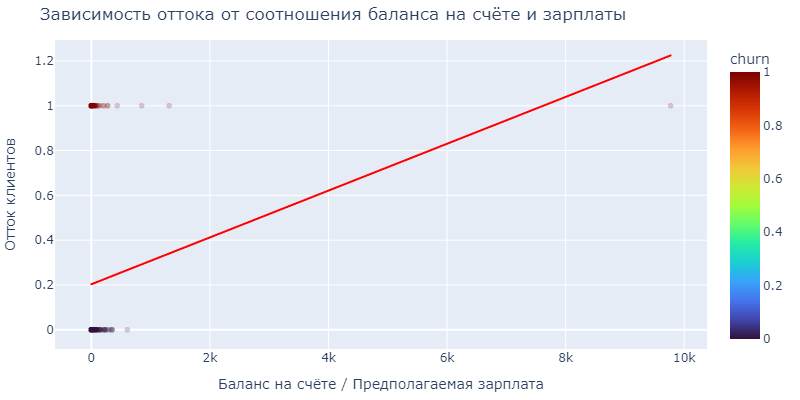

In [713]:
data['balance_estimated_salary_ratio'] = data['balance'] / (data['estimated_salary'] + 1)  # +1 для избежания деления на 0

plot_scatter(data, 'balance_estimated_salary_ratio', 'Баланс на счёте / Предполагаемая зарплата', 'churn', 'Отток клиентов',
             'Зависимость оттока от соотношения баланса на счёте и зарплаты', color='churn')

`Вывод:` С ростом отношения "Баланс на счёте / Предполагаемая зарплата" отток клиентов повышается. Корреляция 0.03. Анализ говорит о том, что клиенты, которые тратят большую часть своей зарплаты уходят реже, а те, кто большую часть своей зарплаты хранит на счёте уходят чаще.

### <a id='toc4_6_4_'></a>[Отношение кредитного рейтинга к балансу на счете](#toc0_)

Изучим данную связь и для этого создадим поле "credit_score_balance_ratio" с данным новым признаком. Кредитный рейтинг делим на баланс на счёте.

После этого построим график распределения, показывающий взаимосвязь. На оси x на графике слева расположены клиенты с низким кредитным рейтингом и большим балансом, а справа высоким кредитным рейтингом и меньшим балансом. Слева на право кредитный рейтинг увеличивается, а баланс на счёте снижается.

Коэффициент корреляции между 'Кредитный рейтинг / Баланс на счёте' и 'Отток клиентов' равен: -0.12


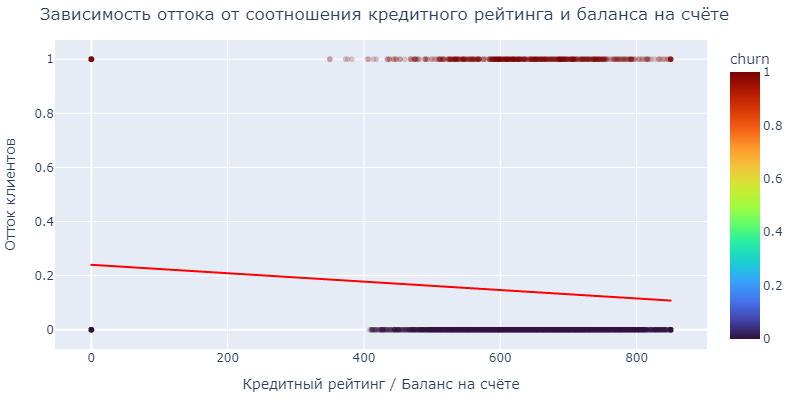

In [714]:
data['credit_score_balance_ratio'] = data['credit_score'] / (data['balance'] + 1)  # +1 для избежания деления на 0

plot_scatter(data, 'credit_score_balance_ratio', 'Кредитный рейтинг / Баланс на счёте', 'churn', 'Отток клиентов',
             'Зависимость оттока от соотношения кредитного рейтинга и баланса на счёте', color='churn')

`Вывод:` С ростом отношения "Кредитный рейтинг / Баланс на счёте" отток клиентов снижается. Корреляция -0.12. Анализ говорит о том, что клиенты с высоким балансом и низким кредитным рейтингом уходят чаще, а те, у кого высокий кредитный рейтинг и низкий баланс уходят реже.

### <a id='toc4_6_5_'></a>[Отношение предполагаемой зарплаты к возрасту клиента](#toc0_)

Изучим данную связь и для этого создадим поле "estimated_salary_age_ratio" с данным новым признаком. Предполагаемую зарплату делим на возраст клиента.

После этого построим график распределения, показывающий взаимосвязь. На оси x на графике слева расположены клиенты с низкой зарплатой относительно их возраста, а справа с высокой зарплатой относительно их возраста. Слева на право зарплата увеличивается, а возраст снижается.

Коэффициент корреляции между 'Предполагаемая зарплата / Возраст' и 'Отток клиентов' равен: -0.10


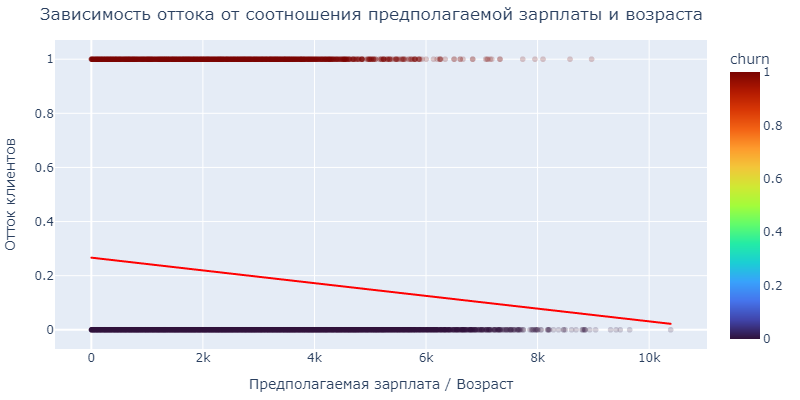

In [715]:
data['estimated_salary_age_ratio'] = data['estimated_salary'] / (data['age'] + 1)  # +1 для избежания деления на 0

plot_scatter(data, 'estimated_salary_age_ratio', 'Предполагаемая зарплата / Возраст', 'churn', 'Отток клиентов',
             'Зависимость оттока от соотношения предполагаемой зарплаты и возраста', color='churn')

`Вывод:` С ростом отношения "Предполагаемая зарплата / Возраст" отток клиентов снижается. Корреляция -0.10. Анализ говорит о том, что клиенты с низкой зарплатой относительно их возраста уходят чаще, а клиенты с высокой зарплатой относительно их возраста реже.

### <a id='toc4_6_6_'></a>[Отношение кредитного рейтинга к предполагаемой зарплате](#toc0_)

Изучим данную связь и для этого создадим поле "credit_score_estimated_salary_ratio" с данным новым признаком. Кредитный рейтинг делим на предполагаемую зарплату.

После этого построим график распределения, показывающий взаимосвязь. На оси x на графике слева расположены клиенты с низким рейтингом и высокой зарплатой, а справа с высоким рейтингом и низкой зарплатой. Слева на право рейтинг увеличивается, а зарплата снижается.

Коэффициент корреляции между 'Кредитный рейтинг / Предполагаемая зарплата' и 'Отток клиентов' равен: 0.02


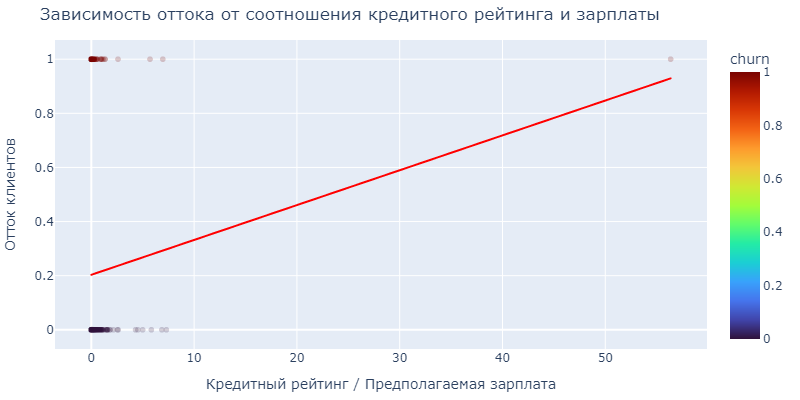

In [716]:
data['credit_score_estimated_salary_ratio'] = data['credit_score'] / (data['estimated_salary'] + 1)  # +1 для избежания деления на 0

plot_scatter(data, 'credit_score_estimated_salary_ratio', 'Кредитный рейтинг / Предполагаемая зарплата', 'churn', 'Отток клиентов',
             'Зависимость оттока от соотношения кредитного рейтинга и зарплаты', color='churn')

`Вывод:` С ростом отношения "Кредитный рейтинг / Предполагаемая зарплата" отток клиентов повышается. Корреляция 0.02. Анализ говорит о том, что клиенты с низким кредитным рейтингом и высокой зарплатой уходят реже, а клиенты с высоким кредитным рейтингом и низкой зарплатой чаще.

---
# <a id='toc5_'></a>[Вывод](#toc0_)

`Предобработка данных` В процессе предобработки данных и для удобства дальнейшего анализа созданы одноимённые поля, в которых преобразованы значения:
- для полей credit_card, active_member, churn значения 1 заменены на "да" и значения 0 на "нет".
- для поля gender заменены значения: "Male" на "Мужчины" и "Female" на "Женщины".
- для поля country заменены значения: 'France': 'Франция', 'Germany': 'Германия', 'Spain': 'Испания'.

---
Распределение клиентов:

`По странам` 50.1% клиентов банка из Франции, 25.1% из Германии и 24.8% из Испании.

`По полу` 54.6% клиентов это мужчины и 45.4% это женщины.

`По возрасту` Медианный возраст клиентов 37 лет и 50% клиентов распределено в возрасте от 32 до 44 лет. Стоит сегментировать клиентов по возрасту и разработать под каждый сегмент своё предложение.

`Соотношение действующих и ушедших клиентов банка` Из 100% клиентов, которые были когда-либо с банком 20.4% перестали пользоваться услугами банка. Значимый процент клиентов перестали пользоваться услугами банков. Необходимо разрабатывать меры по удержанию клиентов.

---
Финансовые показатели. Изучили связь оттока клиентов со следующими финансовыми показателями:

`Баланс на счёте` Баланс на счетах действующих и ушедших клиентов распределен примерно равномерно. Медианный баланс действующих клиентов 92073 и ушедших 109349. В среднем клиенты с большим балансом уходят чаще. Необходимо разработать комплекс мер для удержания более состоятельных клиентов.

`Кредитный рейтинг` Ушедшие клиенты по кредитному рейтингу распределены примерно равномерно. Медианный кредитный рейтинг у действующих клиентов 6653 и у ушедших 646.

`Предполагаемая зарплата` Ушедшие клиенты в зависимости от предполагаемой зарплаты распределены примерно равномерно.

---
Продукты и активность. Изучили связь оттока клиентов со следующими показателями использования продуктов:

`Количество используемых продуктов` Процент ушедших клиентов среди пользующихся кол-вом услуг: 1 услуги - 27.7%, 2 услуги - 7.6%, 3 услуги - 82.7%, 4 услуги - 100% клиентов ушли. Необходимо срочно принять меры и разобраться почему клиенты с большим количеством используемых услуг уходят значительно чаще. Может совокупная стоимость владения 3-4 услугами высока относительно получаемой клиентом ценности?

`Использование кредитной карты` Процент ушедших клиентов среди пользующихся и не пользующихся кредитной картой примерно равен 20%.

`Активность клиента` Процент ушедших клиентов среди активных равен 14.3% и среди не активных 26.9%. Можно сделать вывод, что активность оказывает влияние и более активные клиенты уходят реже. Необходимо разработать ряд мер, направленных на увеличение активности клиентов.

---
Демография и поведение. Изучили связь оттока клиентов со следующими показателями демографии и поведения:

`Возраст клиента` Медианный возраст действующих клиентов 36 и ушедших 45 лет. 50% клиентов по возрасту распределено среди действующих в диапазоне 31-41 год, и среди ушедших в диапазоне 38-51 год. В среднем клиенты более высокого возраста уходят от сотрудничества с банком. Возможно стоит разработать меры по привлечению и удержанию клиентов по старше.

`Срок сотрудничества с банком` Клиенты уходят на разном сроке сотрудничества с банком примерно в одинаковом проценте случаев.

---
Корреляции и взаимодействия

Анализ ушедших клиентов по странам показал, что процент ушедших клиентов составил для Франции 16.2%, для Германии 32.4% и для Испании 16.7%. Необходимо выяснить почему процент ушедших клиентов в Германии значительно выше.

---
Корреляция сложных признаков с оттоком клиентов. Изучили связь оттока клиентов со следующими сложными признаками:

`Отношение возраста клиента к его балансу на счёте` С ростом отношения "Возраст / Баланс" отток клиентов снижается. Корреляция -0.07. Анализ говорит о том, что клиенты с большим возрастом и меньшим балансом реже уходят из банка и более лояльны.

`Отношение возраста клиента к сроку сотрудничества с банком` С ростом отношения "Возраст / Срок сотрудничества" отток клиентов повышается. Корреляция 0.11. Анализ говорит о том, что клиенты, которые начали сотрудничать с банком в более раннем возрасте меньше уходят от сотрудничества с банком, чем те, кто пришёл в банк в более зрелом возрасте.

`Отношение баланса на счёте к предполагаемой зарплате` С ростом отношения "Баланс на счёте / Предполагаемая зарплата" отток клиентов повышается. Корреляция 0.03. Анализ говорит о том, что клиенты, которые тратят большую часть своей зарплаты уходят реже, а те, кто большую часть своей зарплаты хранит на счёте уходят чаще.

`Отношение кредитного рейтинга к балансу на счёте` С ростом отношения "Кредитный рейтинг / Баланс на счёте" отток клиентов снижается. Корреляция -0.12. Анализ говорит о том, что клиенты с высоким балансом и низким кредитным рейтингом уходят чаще, а те, у кого высокий кредитный рейтинг и низкий баланс уходят реже.

`Отношение предполагаемой зарплаты к возрасту клиента` С ростом отношения "Предполагаемая зарплата / Возраст" отток клиентов снижается. Корреляция -0.10. Анализ говорит о том, что клиенты с низкой зарплатой относительно их возраста уходят чаще, а клиенты с высокой зарплатой относительно их возраста реже.

`Отношение кредитного рейтинга к предполагаемой зарплате` С ростом отношения "Кредитный рейтинг / Предполагаемая зарплата" отток клиентов повышается. Корреляция 0.02. Анализ говорит о том, что клиенты с низким кредитным рейтингом и высокой зарплатой уходят реже, а клиенты с высоким кредитным рейтингом и низкой зарплатой чаще.